<a href="https://colab.research.google.com/github/cryotheta/astrpy_workshop/blob/main/ASTRO_PYTHON_WORKSHOP_BASICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Astropy**
1. Units, Constants
1. FITS Files
2. Coordinate Systems

In [ ]:
from astropy.constants import G,c, M_sun, M_earth
print(G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018 
 
   Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [ ]:
# to method is used to change units
print(G.to('cm3/(g*s2)'))
print(c.to('cm/s'))

6.674299999999998e-08 cm3 / (g s2)
29979245800.0 cm / s


Constants are a special case of  more general objects called Quantities. Consider the following example. Quantities have a value and a unit.

In [ ]:
from astropy import units as u
quantity=42.0 * u.meter
print(quantity)
print(quantity.value, type(quantity.value))
print(quantity.unit)

42.0 m
42.0 <class 'numpy.float64'>
m


Astropy handles the dimensions when we multiply quantitites. For details visit https://docs.astropy.org/en/stable/units/index.html

In [ ]:
distance=45*u.meter
time=20*u.second
speed=distance/time
print(speed)

2.25 m / s


**Astronomical Coordinates**

Astropy has a special package called coordinates with classes to handle astronomical coordinates and conversion between coordiate systems.

In [ ]:
from astropy.coordinates import SkyCoord, AltAz
coord = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
## You can specify the frame of reference which is used to measure ra and dec.
## ICRS is The International Celestial Reference System (ICRS) is the current standard celestial reference system adopted by the International Astronomical Union (IAU).
## Its origin is at the barycenter of the Solar System, with axes that are intended to be "fixed" with respect to space.

In [ ]:
print(coord)
print(coord.ra,coord.dec) #prints in degrees, minutes, seconds
print(coord.ra.hms,coord.dec.hms) #prints in hours, minutes, seconds


<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
10d37m30s 41d12m00s
hms_tuple(h=0.0, m=42.0, s=30.000000000000426) hms_tuple(h=2.0, m=44.0, s=48.000000000002814)


Let's see how to change between different frames of reference.

In [ ]:
coord_galactic=coord.galactic
print(coord_galactic)

<SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>


Converting to AltAz requires the loactation and the time information. Let's do see how to do this.


In [ ]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
coord.transform_to(AltAz(obstime=Time('2012-7-12 23:00:00'),location=EarthLocation(lat=23*u.deg,lon=81*u.deg,height=100*u.meter)))

<SkyCoord (AltAz: obstime=2012-07-12 23:00:00.000, location=(918927.43761251, 5801879.50110243, 2476758.4032042) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (28.72464846, 68.4832405)>

Astropy can compute distances between two objects with different coordinates. Notice how distance parameter is required in this case


In [ ]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
c1.separation_3d(c2)  
## It's not necessary for both the coordinates to be in the same frame, astropy handles the conversion.

<Distance 1.52286024 pc>

In [ ]:
## On-Sky distance
c1.separation(c2)  


<Angle 1.40453973 deg>

https://docs.astropy.org/en/stable/coordinates/index.html Visit for details and tips and tricks.

**FITS FILE I/O**
FITS is a format widely used by astronomers around the globe to share astronomical image data.

In [ ]:
>>> from astropy.io import fits

fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(fits_image_filename)

The open() function has several optional arguments. The default mode, as in the above example, is “readonly”. The open function returns an object called an HDUList which is a list-like collection of HDU objects. An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a **header** and (typically) a **data** array or table.

In [ ]:
hdul.info()

Filename: /usr/local/lib/python3.7/dist-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


This FITS file contains 5 HDU componesnts, Let's look at the data first and then we can look at what the headers are.

In [ ]:
data1=hdul[1].data
data2=hdul[2].data
data3=hdul[3].data
data4=hdul[4].data

In [ ]:
from matplotlib import pyplot as plt

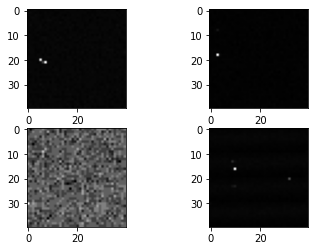

In [ ]:
plot,ax=plt.subplots(2,2)
ax[0,0].imshow(data1,cmap='gray')
ax[0,1].imshow(data2,cmap='gray')
ax[1,0].imshow(data3,cmap='gray')
ax[1,1].imshow(data4,cmap='gray')

The header of this FITS file contains a lot of information about the when and where and how of the image. The header tells us all the necessary details about the telescope, the camera, the target being observed, the observing conditions and so on.

In [ ]:
header=hdul[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

In [ ]:
header['EQNX_SUN']

2000.0

In [ ]:
fits_image_filename = '/content/drive/MyDrive/m3-sdss-g.fits'

hdul = fits.open(fits_image_filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hdul.info()

Filename: /content/drive/MyDrive/m3-sdss-g.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   (2048, 1489)   int16 (rescales to uint16)   


In [ ]:
hdul[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
BZERO   = 3.27680000000000E+04                                                  
BSCALE  = 1.00000000000000E+00                                                  
TAI     =        4591927149.13 / 1st row - Number of seconds since Nov 17 1858  
RA      =            206.21533 / 1st row - Right ascension of telescope boresigh
DEC     =            28.290098 / 1st row - Declination of telescope boresight (d
SPA     =             100.424  / 1st row - Camera col position angle wrt north (
IPA     =              27.747  / 1st row - Instrument rotator position angle (de
IPARATE =              0.003

In [ ]:
image=hdul[0].data

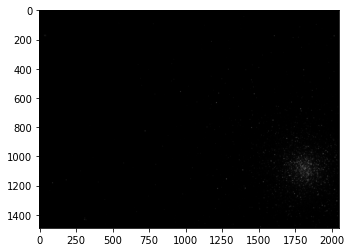

In [ ]:
plt.imshow(image,cmap='gray')

Astropy has several statistics features inbuilt, on such is sigma clipped stats, median absolute deviation etc.

In [ ]:
from astropy.stats import sigma_clipped_stats, median_absolute_deviation


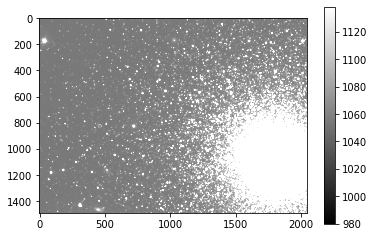

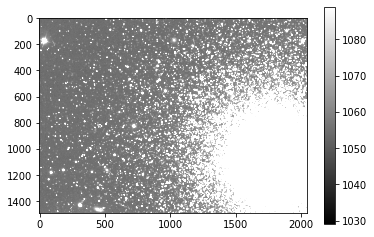

In [ ]:
mean, median, std = sigma_clipped_stats(image)
mad_std=median_absolute_deviation(image)

# set the scale of the image based on its statistics
# any pixel above vmax will show up with the same color as vmax. And vice-versa for vmin
plt.imshow(image, vmin = median - 5*std, vmax = median + 5*std, cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(image, vmin = median - 5*mad_std, vmax = median + 5*mad_std, cmap='gray')
plt.colorbar()
plt.show()

**AstroQuery**
Astroquery is a set of tools for querying astronomical web forms and databases. 

In [1]:
from astroquery.simbad import Simbad

ModuleNotFoundError: ignored